# Modelo de Neurona: Perceptrón
---
### Regresión Lineal
5 de octubre de 2016

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from random import random,randint,seed,sample
import matplotlib.pyplot as plt
import pandas as pda
import numpy as np
%matplotlib inline
from __future__ import division
seed(20160918)

### Ejercicio 1

In [12]:
df1 = pda.read_table("../datos_clase/regLin4.csv", sep=",", header = 0)
df1[:4]

,X,y
0,71.130300,0
1,36.872465,0
2,56.508402,0
3,78.120147,0


In [13]:
y1 = df1[:][df1.columns[1]]
x1 = df1[:][df1.columns[0]]
x1_c = (x1 - np.mean(x1))/np.var(x1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_c, y1, train_size=0.75)

In [14]:
def MseEst(wsact, xmat, yvec):
    yfit = wsact[0] + wsact[1]*xmat
    gx = []
    for reng in range(len(yfit)):
        gxv = 0
        if yfit[reng]>0:
            gxv = 1
        gx.append(gxv)
    mse = np.sum(yvec - gx)
    return mse

def WsEnt(wsinit, nu, yvec, xmat):
    ws = np.asarray(wsinit)
    for reng in range(len(yvec)):
        # reng = 0
        xobsreng = np.asarray(xmat)[reng]
        yobsreng = np.asarray(yvec)[reng]
        # costo
        vx = ws[0] + ws[1]*xobsreng
        # perceptron
        gxact = 0
        if vx > 0:
            gxact = 1
        # error
        error = (yobsreng - gxact)
        # actualización de ws
        ws[0] = ws[0] + nu*error*1
        ws[1] = ws[1] + nu*error*xobsreng
    return ws

def LinRegrPercep(wsinit, yvec, xmat, nuval):
    wsent = WsEnt(wsinit = wsinit, 
                nu = nuval, 
                yvec = yvec, xmat = xmat)
    error = MseEst(wsact = wsent, xmat = xmat, yvec = yvec)
    return wsent, error

def fitgx(ws0, ws1, xmat):
    fity = []
    gxfit = ws0 + ws1*xmat
    for i in range(len(gxfit)):
        act = 0
        if gxfit[i] > 0:
            act = 1
        fity.append(act)
    return fity

Conjunto de Prueba

In [15]:
ws0list = [0.0]
ws1list = [0.0]
errorlist = [0]
for val in range(50+1)[1:]:
    regi = LinRegrPercep(wsinit = [ws0list[val-1], 
                                   ws1list[val-1]] , 
                         yvec = np.asarray(y1_train), 
                         xmat = np.asarray(x1_train),
                         nuval = .5)
    ws0list.append(regi[0][0])
    ws1list.append(regi[0][1])
    errorlist.append(regi[1])

In [16]:
fit_train = fitgx(ws0 = ws0list[len(ws0list[1:])], 
      ws1 = ws1list[len(ws1list[1:])], 
      xmat = np.asarray(x1_train) )

In [17]:
confusion_matrix(y1_train, fit_train)

array([[530,   0],
       [ 11, 230]])

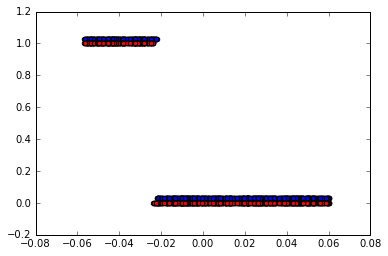

In [18]:
plt.scatter(x1_train, y1_train+.03)
plt.scatter(x1_train, fit_train, c = 'red')

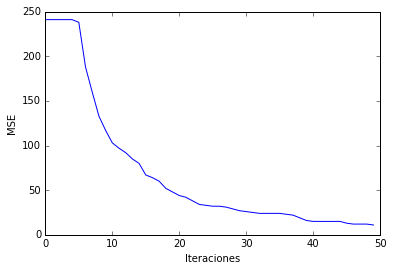

In [19]:
plt.plot(errorlist[1:])
plt.ylabel("MSE")
plt.xlabel("Iteraciones")

Entrenamiento 

In [20]:
fit_test = fitgx(ws0 = ws0list[len(ws0list[1:])], 
      ws1 = ws1list[len(ws1list[1:])], 
      xmat = np.asarray(x1_test) )

In [21]:
confusion_matrix(y1_test, fit_test)

array([[164,   0],
       [  4,  90]])

### Ejercicio 2
---
#### XAND

In [22]:
d = {'x1' : pda.Series([0,0,1,1]),
     'x2' : pda.Series([0,1,0,1]),
     'y' : pda.Series([0,0,0,1])
    }
dfand = pda.DataFrame(d)

In [23]:
def WsEntMult(wsinit, nu, yvec, xmat):
    ws = np.asarray(wsinit)
    for reng in range(len(yvec)):
        # reng = 0
        xobsreng = np.asarray(xmat)[reng]
        yobsreng = np.asarray(yvec)[reng]
        # costo
        vx = ws[0] + np.sum(xobsreng*np.asarray(ws[1:]))
        # perceptron
        gxact = 0
        if vx > 0:
            gxact = 1
        # error
        error = (yobsreng - gxact)
        # actualización de ws
        ws[0] = ws[0] + nu*error*1 
        for i in range(len(ws)-1):
            ws[i+1] = ws[i+1] + nu*error*xobsreng[i]
    return ws

def MseEstMult(wsact, xmat, yvec):
    yfit = wsact[0] + np.dot(np.asarray(xmat), wsact[1:])
    gx = []
    for reng in range(len(yfit)):
        gxv = 0
        if yfit[reng] > 0:
            gxv = 1
        gx.append(gxv)
    mse = np.sum(yvec - gx)
    return mse

def LinRegrPercepMult(wsinit, yvec, xmat, nuval):
    wsent = WsEntMult(wsinit = wsinit, 
                nu = nuval, 
                yvec = yvec, 
                xmat = xmat)
    error = MseEstMult(wsact = wsent, xmat = xmat, yvec = yvec)
    return wsent, error

def FitgxMult(ws, xmat):
    fity = []
    gxfit = ws[0] + np.dot(np.asarray(xmat), ws[1:])
    for i in range(len(gxfit)):
        act = 0
        if gxfit[i] > 0:
            act = 1
        fity.append(act)
    return fity

In [24]:
wslist = [[1.0, 1.0, 1.0]]
errorlist = [0]
sumfitlist = [0]
for val in range(100+1)[1:]:
    resand = LinRegrPercepMult(wsinit = wslist[val-1] , 
                         yvec = np.array(dfand[dfand.columns[2]]), 
                         xmat = np.array(dfand[dfand.columns[:2]]),
                         nuval = .1)
    fitval = FitgxMult(ws = resand[0], 
                       xmat = np.array(dfand[dfand.columns[:2]]) )
    sumfitval = np.sum(fitval != np.array(dfand[dfand.columns[2]]) )
    wslist.append(resand[0])
    errorlist.append(resand[1])
    sumfitlist.append(sumfitval)

In [25]:
fit_and = FitgxMult(ws = wslist[len(wslist[1:])], 
                      xmat = np.array(dfand[dfand.columns[:2]]) )

In [26]:
confusion_matrix(np.array(dfand[dfand.columns[2]]), 
                 fit_and)

array([[3, 0],
       [0, 1]])

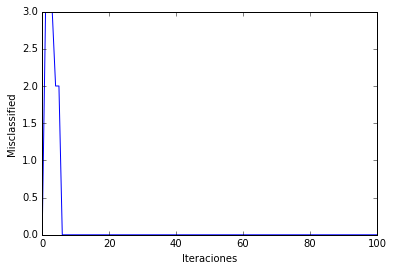

In [27]:
plt.plot(sumfitlist)
plt.ylabel('Misclassified')
plt.xlabel('Iteraciones')

In [28]:
ws = wslist[len(wslist[1:])]
m=((ws[0]/ws[2]))/((-ws[0]/ws[1]))

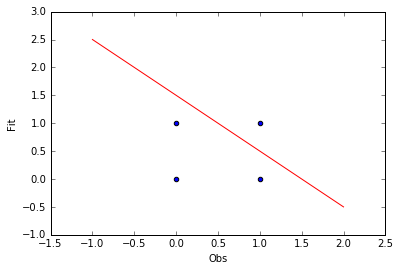

In [29]:
plt.scatter(dfand[dfand.columns[0]], dfand[dfand.columns[1]])
x2 = np.linspace(-1,2,100) # 100 numeros espaciados
plt.plot(x2,-ws[0]/ws[2]+m*x2,color='red')
plt.xlabel("Obs")
plt.ylabel("Fit")